In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import scipy.stats as scs
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [76]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [77]:
df.drop('waterfront',axis=1,inplace=True)

In [78]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,zipcode,Age_of_House,Years_last_renovation,basement,biggerliving,biggerlot,distance_from_a_city,distance_from_airport
0,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,98125,69,29,1,1,0,12.613856,30.859494
1,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,98028,87,87,0,0,1,14.375822,33.112379
2,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,98136,55,55,1,1,0,10.617501,10.988905
3,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,98074,33,33,0,0,1,11.683886,27.230991
5,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,98003,25,25,0,0,0,33.155745,14.995397


In [79]:
df = df.loc[df['sqft_lot']<45000.00]

In [82]:
df.price.mean()+3.5*df.price.std()

1313991.30523476

In [83]:
df = df.loc[df['price']<1350000]

In [84]:
tobox =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city', 'distance_from_airport']

In [85]:
for feat in tobox:
    df[feat],b = scs.boxcox(df[feat])


In [86]:
df['sqft_lot'] = np.log(df['sqft_lot'])

In [87]:
def norm_feat(series):
    return (series - series.mean())/series.std()

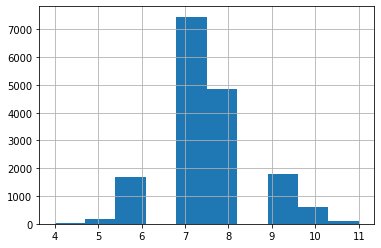

In [88]:
df['grade'].hist()

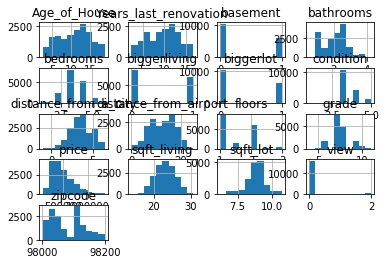

In [89]:
df.hist();

# Making interaction feature so I can use bedrooms and bathrooms in my model

In [90]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [91]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'zipcode', 'Age_of_House',
       'Years_last_renovation', 'basement', 'biggerliving', 'biggerlot',
       'distance_from_a_city', 'distance_from_airport', 'bedbath'],
      dtype='object')

# Choosing my features

In [92]:
tomodel = ['bedrooms','bathrooms','sqft_living','sqft_lot','biggerliving','biggerlot',
           'distance_from_a_city','Years_last_renovation','basement','bedbath']

In [93]:
for feat in tomodel:
    df[feat] = norm_feat(df[feat])

In [104]:
tomodel = ['bedrooms','bathrooms','sqft_living','sqft_lot','biggerliving','biggerlot',
           'distance_from_a_city','Years_last_renovation','basement','grade']

In [105]:
X = df[tomodel]
y = df['price']

In [106]:
X.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,biggerliving,biggerlot,distance_from_a_city,Years_last_renovation,basement,grade
bedrooms,1.000000,0.494748,0.640167,0.235108,0.362027,0.076527,0.071519,-0.169682,0.137492,0.340211
bathrooms,0.494748,1.000000,0.724627,-0.018146,0.305180,0.056968,0.056051,-0.587333,0.130464,0.611504
sqft_living,0.640167,0.724627,1.000000,0.276889,0.490774,0.108431,0.060344,-0.374732,0.194320,0.693417
sqft_lot,0.235108,-0.018146,0.276889,1.000000,0.061053,0.277861,0.336677,0.195827,-0.060499,0.076309
biggerliving,0.362027,0.305180,0.490774,0.061053,1.000000,0.067153,-0.008353,-0.048247,0.241815,0.160381
biggerlot,0.076527,0.056968,0.108431,0.277861,0.067153,1.000000,0.080305,-0.010340,-0.011023,0.041209
distance_from_a_city,0.071519,0.056051,0.060344,0.336677,-0.008353,0.080305,1.000000,-0.246329,-0.226694,-0.062142
Years_last_renovation,-0.169682,-0.587333,-0.374732,0.195827,-0.048247,-0.010340,-0.246329,1.000000,0.156914,-0.496279
basement,0.137492,0.130464,0.194320,-0.060499,0.241815,-0.011023,-0.226694,0.156914,1.000000,0.002340
grade,0.340211,0.611504,0.693417,0.076309,0.160381,0.041209,-0.062142,-0.496279,0.002340,1.000000


# Making My Model

In [107]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          3.219e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:55:04   Log-Likelihood:                     -2.1804e+05
No. Observations:               16667   AIC:                                  4.361e+05
Df Residuals:                   16657   BIC:                                  4.362e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.476e+04   1194.947    -12.352      0.000   -1.71e+04   -1.24e+04
bathrooms              1.316e+04   1558.549      8.446      0.000    1.01e+04    1.62e+04
sqft_living            1.052e+05   1743.020     60.328      0.000    1.02e+05    1.09e+05
sqft_lot               1.357e+04   1202.120     11.285      0.000    1.12e+04    1.59e+04
biggerliving            -1.3e+04   1076.723    -12.078      0.000   -1.51e+04   -1.09e+04
biggerlot             -3168.4223    942.546     -3.362      0.001   -5015.913   -1320.932
distance_from_a_city   -1.15e+05   1056.090   -108.908      0.000   -1.17e+05   -1.13e+05
Years_last_renovation  2.279e+04   1308.634     17.417      0.000    2.02e+04    2.54e+04
basement              -1.208e+04    989.676    -12.210      0.000    -1.4e+04   -1.01e+04
grade                  6.346e+04    119.507    531.038      0.000    6.32e+04    6.37e+04
==============================================================================
Omnibus:                     1781.723   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4046.976
Skew:                           0.653   Prob(JB):                         0.00
Kurtosis:                       5.030   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          3.219e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:55:04   Log-Likelihood:                     -2.1804e+05
No. Observations:               16667   AIC:                                  4.361e+05
Df Residuals:                   16657   BIC:                                  4.362e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.476e+04   1194.947    -12.352      0.000   -1.71e+04   -1.24e+04
bathrooms              1.316e+04   1558.549      8.446      0.000    1.01e+04    1.62e+04
sqft_living            1.052e+05   1743.020     60.328      0.000    1.02e+05    1.09e+05
sqft_lot               1.357e+04   1202.120     11.285      0.000    1.12e+04    1.59e+04
biggerliving            -1.3e+04   1076.723    -12.078      0.000   -1.51e+04   -1.09e+04
biggerlot             -3168.4223    942.546     -3.362      0.001   -5015.913   -1320.932
distance_from_a_city   -1.15e+05   1056.090   -108.908      0.000   -1.17e+05   -1.13e+05
Years_last_renovation  2.279e+04   1308.634     17.417      0.000    2.02e+04    2.54e+04
basement              -1.208e+04    989.676    -12.210      0.000    -1.4e+04   -1.01e+04
grade                  6.346e+04    119.507    531.038      0.000    6.32e+04    6.37e+04
==============================================================================
Omnibus:                     1781.723   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4046.976
Skew:                           0.653   Prob(JB):                         0.00
Kurtosis:                       5.030   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] <= 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

10 10
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'biggerliving']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.476e+04,1194.947,-12.352,0.0,-1.71e+04,-1.24e+04
bathrooms,1.316e+04,1558.549,8.446,0.0,1.01e+04,1.62e+04
sqft_living,1.052e+05,1743.020,60.328,0.0,1.02e+05,1.09e+05
sqft_lot,1.357e+04,1202.120,11.285,0.0,1.12e+04,1.59e+04
biggerliving,-1.3e+04,1076.723,-12.078,0.0,-1.51e+04,-1.09e+04


In [110]:
X = df[x_cols]
y= df['price']

In [111]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          3.219e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:55:06   Log-Likelihood:                     -2.1804e+05
No. Observations:               16667   AIC:                                  4.361e+05
Df Residuals:                   16657   BIC:                                  4.362e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.476e+04   1194.947    -12.352      0.000   -1.71e+04   -1.24e+04
bathrooms              1.316e+04   1558.549      8.446      0.000    1.01e+04    1.62e+04
sqft_living            1.052e+05   1743.020     60.328      0.000    1.02e+05    1.09e+05
sqft_lot               1.357e+04   1202.120     11.285      0.000    1.12e+04    1.59e+04
biggerliving            -1.3e+04   1076.723    -12.078      0.000   -1.51e+04   -1.09e+04
biggerlot             -3168.4223    942.546     -3.362      0.001   -5015.913   -1320.932
distance_from_a_city   -1.15e+05   1056.090   -108.908      0.000   -1.17e+05   -1.13e+05
Years_last_renovation  2.279e+04   1308.634     17.417      0.000    2.02e+04    2.54e+04
basement              -1.208e+04    989.676    -12.210      0.000    -1.4e+04   -1.01e+04
grade                  6.346e+04    119.507    531.038      0.000    6.32e+04    6.37e+04
==============================================================================
Omnibus:                     1781.723   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4046.976
Skew:                           0.653   Prob(JB):                         0.00
Kurtosis:                       5.030   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.761806329060175),
 ('bathrooms', 2.9971044529860142),
 ('sqft_living', 3.7485712063292462),
 ('sqft_lot', 1.783023331590588),
 ('biggerliving', 1.4304381265003154),
 ('biggerlot', 1.0961409059271094),
 ('distance_from_a_city', 1.3761399786569464),
 ('Years_last_renovation', 2.1129908957035872),
 ('basement', 1.208502066680506),
 ('grade', 1.011219322996725)]

In [113]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

10 10


In [114]:
X = df[x_cols]
y= df['price']

In [115]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          3.219e+04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                        0.00
Time:                        18:55:09   Log-Likelihood:                     -2.1804e+05
No. Observations:               16667   AIC:                                  4.361e+05
Df Residuals:                   16657   BIC:                                  4.362e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.476e+04   1194.947    -12.352      0.000   -1.71e+04   -1.24e+04
bathrooms              1.316e+04   1558.549      8.446      0.000    1.01e+04    1.62e+04
sqft_living            1.052e+05   1743.020     60.328      0.000    1.02e+05    1.09e+05
sqft_lot               1.357e+04   1202.120     11.285      0.000    1.12e+04    1.59e+04
biggerliving            -1.3e+04   1076.723    -12.078      0.000   -1.51e+04   -1.09e+04
biggerlot             -3168.4223    942.546     -3.362      0.001   -5015.913   -1320.932
distance_from_a_city   -1.15e+05   1056.090   -108.908      0.000   -1.17e+05   -1.13e+05
Years_last_renovation  2.279e+04   1308.634     17.417      0.000    2.02e+04    2.54e+04
basement              -1.208e+04    989.676    -12.210      0.000    -1.4e+04   -1.01e+04
grade                  6.346e+04    119.507    531.038      0.000    6.32e+04    6.37e+04
==============================================================================
Omnibus:                     1781.723   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4046.976
Skew:                           0.653   Prob(JB):                         0.00
Kurtosis:                       5.030   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.761806329060175),
 ('bathrooms', 2.9971044529860142),
 ('sqft_living', 3.7485712063292462),
 ('sqft_lot', 1.783023331590588),
 ('biggerliving', 1.4304381265003154),
 ('biggerlot', 1.0961409059271094),
 ('distance_from_a_city', 1.3761399786569464),
 ('Years_last_renovation', 2.1129908957035872),
 ('basement', 1.208502066680506),
 ('grade', 1.011219322996725)]

In [117]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [118]:
residuals = model.resid

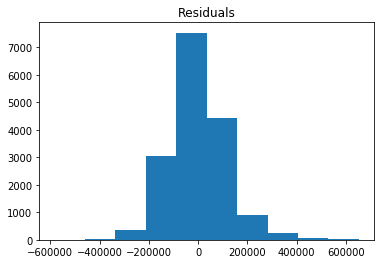

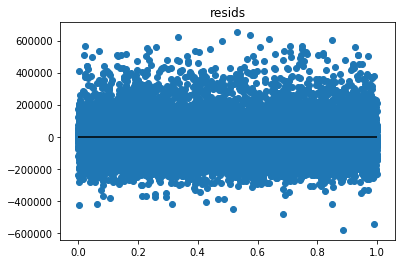

In [119]:
plot_residuals(residuals)

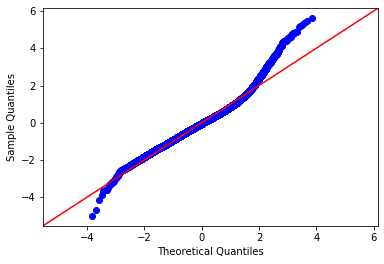

In [120]:
fig = sm.graphics.qqplot(residuals, dist=scs.norm, line='45', fit=True)


# Build Mode in Sklearn

In [32]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [34]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [35]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=False)

In [36]:
ols.coef_

array([ 110273.37966723,   18350.20148301,  -14216.71671106,
         -3986.80290411, -125127.52179907,   15026.07512247,
        -11299.8599651 ,   64773.01824091])

In [37]:
ols.intercept_

0.0

In [38]:
# let's get our training predictions
y_train_preds = ols.predict(X_train)
y_train_preds

array([273726.62737984, 508356.32030348, 417696.69963763, ...,
       473630.68716683, 362007.68014645, 495046.86091407])

In [46]:
r2_score(y_train, y_train_preds)

0.7086280229771649

In [47]:
y_hat_train = ols.predict(X_train)
y_hat_test = ols.predict(X_test)

In [48]:
from sklearn.metrics import mean_squared_error
test_residuals = y_hat_test - y_test

test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

15991610296.00925

In [49]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
train_mse

16301111413.861723

In [50]:
def get_score(model ,X_train, y_train):
    y_train_preds = model.predict(X_train)

In [51]:
# r2 
training_score = ols.score(X_train, y_train)
# ols.score is calculating the y_train_preds and then using those to get the r2 score
training_score

0.7086280229771649

In [52]:
testing_score = ols.score(X_test, y_test)
testing_score

0.7181482681969089

In [53]:
cv_scores = cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) 
# cv breaks your data into that many equal pieces 
cv_scores

array([0.71921552, 0.70398318, 0.70973312, 0.7205715 , 0.69152455])

In [54]:
np.mean(cv_scores)

0.7090055729492816

In [55]:

cv_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
cv_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20 = np.mean(cross_val_score(ols,X , y, cv=20, scoring='neg_mean_squared_error'))
print(cv_5)
print(cv_10)
print(cv_20)

-16291190706.886204
-16305161793.375626
-16278814757.5634


In [56]:

cv_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring="r2"))
cv_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring="r2"))
cv_20 = np.mean(cross_val_score(ols,X , y, cv=20, scoring="r2"))
print(cv_5)
print(cv_10)
print(cv_20)

0.7090055729492816
0.7079759322327159
0.7081980832202263


In [57]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    print(f"train score = {train_score}")
    print(f"test score = {test_score}")
    return ols

In [58]:
make_ols_sklearn(X, y)

train score = 0.7103431855231624
test score = 0.7115330448709584


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [59]:
make_ols_sklearn(X, y)

train score = 0.710277234594427
test score = 0.7118771374690441


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [60]:
make_ols_sklearn(X, y)

train score = 0.7097223835299183
test score = 0.7137731195225208


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [61]:
make_ols_sklearn(X, y)

train score = 0.7115044914364105
test score = 0.7070222307350915


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [62]:
make_ols_sklearn(X, y)

train score = 0.7104937912537925
test score = 0.7110494734757106


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [63]:
make_ols_sklearn(X, y)

train score = 0.7094146327763577
test score = 0.7152429115856385


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [64]:
make_ols_sklearn(X, y)

train score = 0.7111197982862436
test score = 0.7086122486293511


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [65]:
residuals

0         18465.974669
1         -6654.097775
2        128355.118332
3        -14436.370468
5         21815.730712
             ...      
19216      1682.547462
19217   -106810.844234
19218   -175320.553075
19219    -84903.025567
19220   -156792.284461
Length: 17206, dtype: float64

In [66]:
y

0        538000.0
1        180000.0
2        604000.0
3        510000.0
5        257500.0
           ...   
19216    475000.0
19217    360000.0
19218    400000.0
19219    402101.0
19220    325000.0
Name: price, Length: 17206, dtype: float64

In [67]:
resid = pd.DataFrame(y)

In [68]:
resid['residuals']  = residuals

In [69]:
resid

,price,residuals
0,538000.0,18465.974669
1,180000.0,-6654.097775
2,604000.0,128355.118332
3,510000.0,-14436.370468
5,257500.0,21815.730712
...,...,...
19216,475000.0,1682.547462
19217,360000.0,-106810.844234
19218,400000.0,-175320.553075
19219,402101.0,-84903.025567


In [70]:
import seaborn as sns

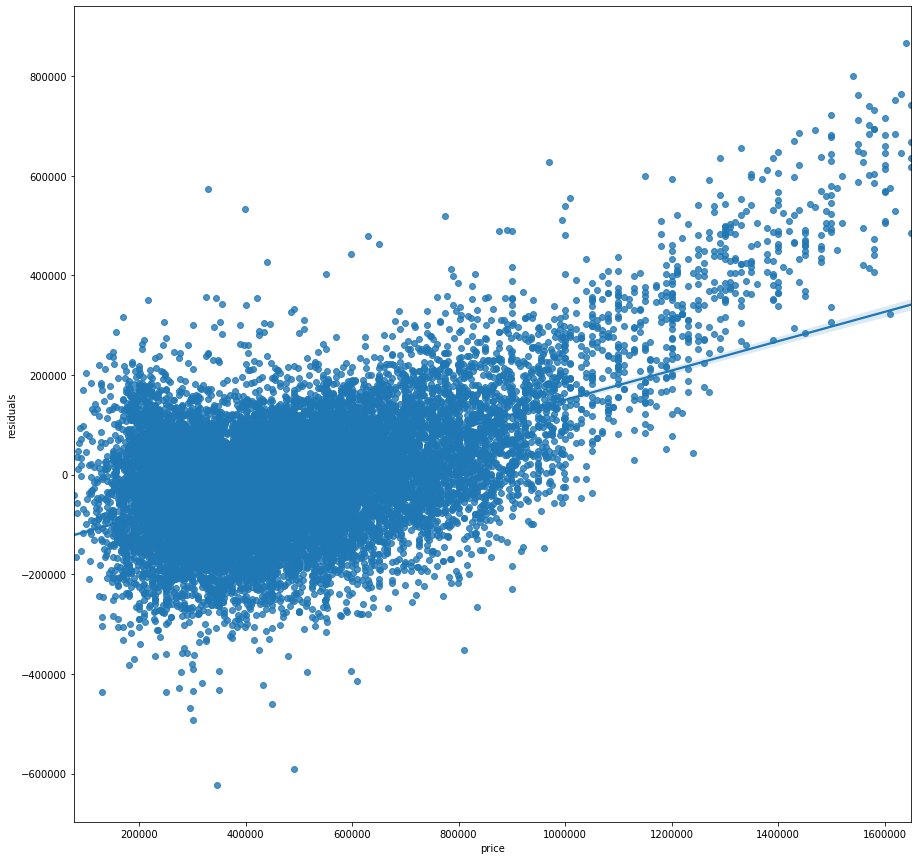

In [71]:
plt.figure(figsize= (15,15))

sns.regplot(y='residuals',x='price',data=resid)